<a href="https://colab.research.google.com/github/AhmedSw10/car_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# **1. Initial Data Understanding**

*   Data Loading and Inspection

*   Duplicates

*   Missing Values

*   Data Types


In [1]:
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4






# **check duplicated**

In [2]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [4]:
df.shape

(18924, 18)

### 2.Basic Statistical Overview
- Summary Statistics ('describe()', 'value_counts())
- Zero and Constant Values

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.select_dtypes(object).describe()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [7]:
from numpy._core import numeric
df['Levy'].replace({'-':0},inplace=True)
df['Levy']=pd.to_numeric(df['Levy'])
df['Levy'].describe()


/tmp/ipython-input-24408882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({'-':0},inplace=True)


,Levy
count,18924.000000
mean,632.886493
std,568.273736
min,0.000000
25%,0.000000
50%,642.000000
75%,917.000000
max,11714.000000


In [8]:
df['Engine volume'].head(50)

,Engine volume
0,3.5
1,3
2,1.3
3,2.5
4,1.3
5,2
6,1.8
7,2.4
8,2.5
9,3.5


In [9]:
df['Engine volume']=df['Engine volume'].str.replace(' Turbo','')
df['Engine volume']=pd.to_numeric(df['Engine volume'])


In [10]:
df['Engine volume'].unique()


array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [11]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=pd.to_numeric(df['Mileage'])
df['Mileage'].describe()

,Mileage
count,1.892400e+04
mean,1.555373e+06
std,4.880221e+07
min,0.000000e+00
25%,7.019575e+04
50%,1.264000e+05
75%,1.891198e+05
max,2.147484e+09


<Axes: >

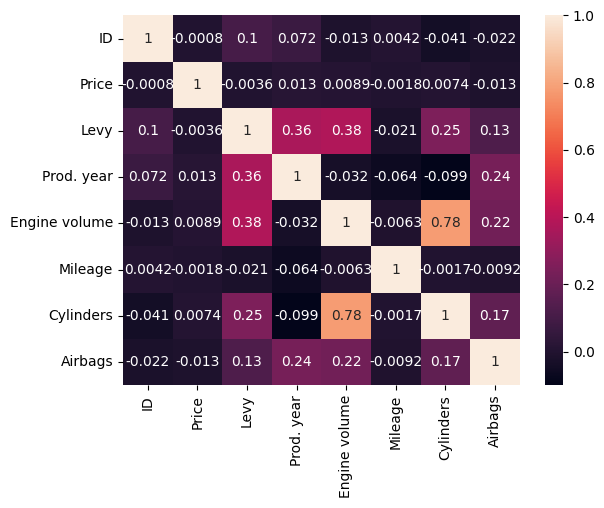

In [12]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


In [13]:
df['Engine volume'].describe()

,Engine volume
count,18924.000000
mean,2.306251
std,0.877591
min,0.000000
25%,1.800000
50%,2.000000
75%,2.500000
max,20.000000


## **Outlier**

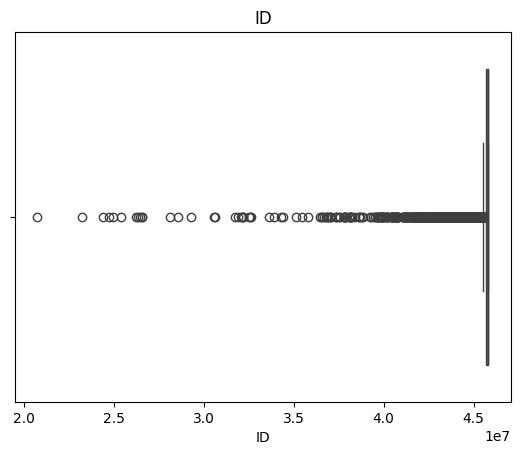

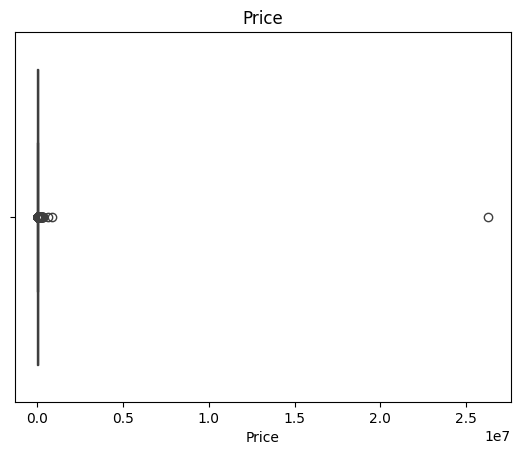

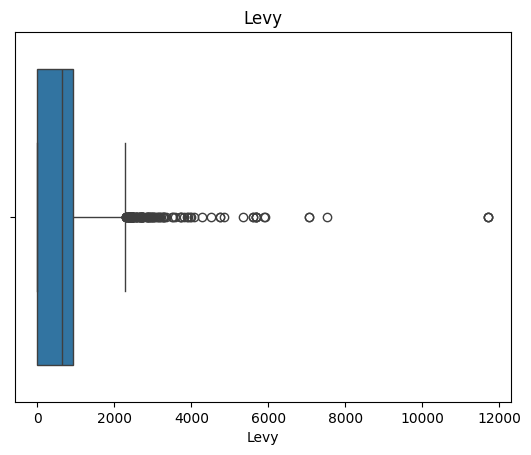

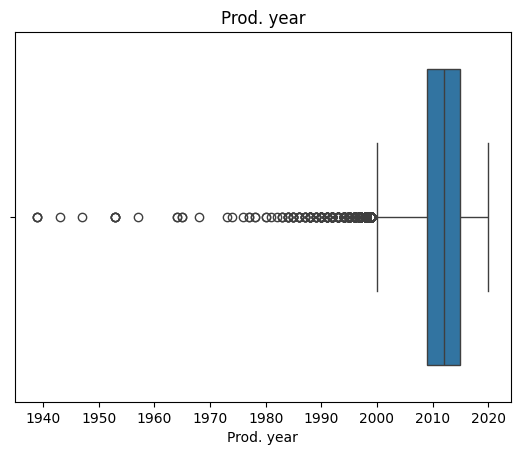

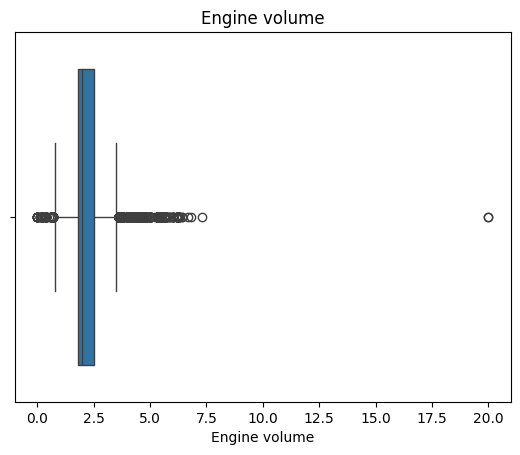

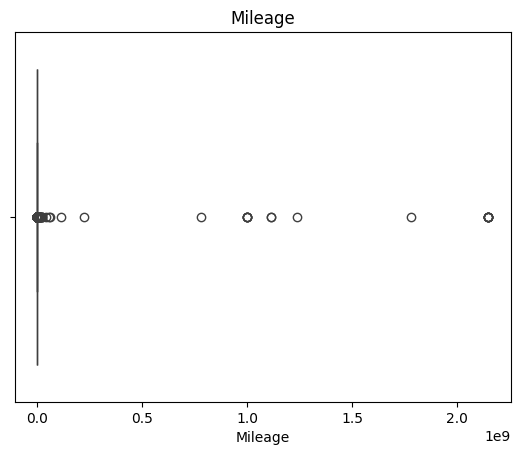

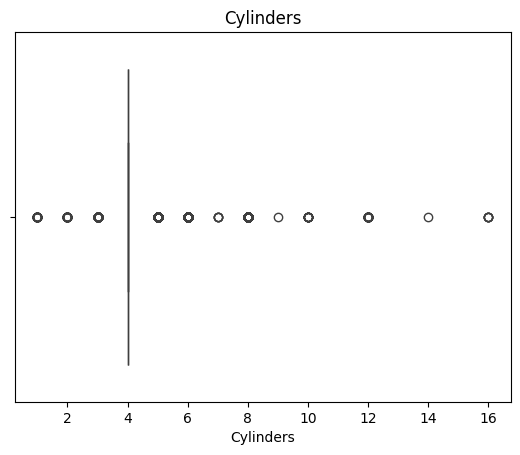

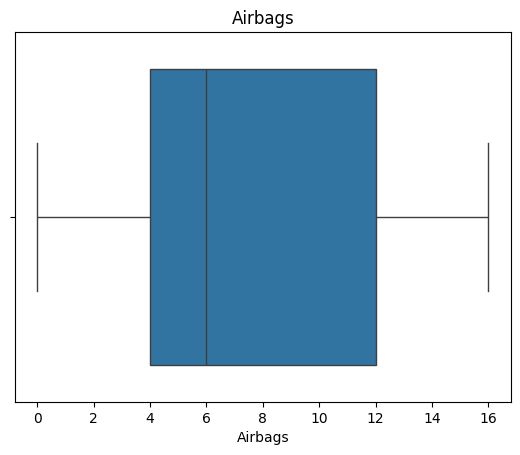

In [14]:
import seaborn as sns
for col in df.select_dtypes(include='number').columns:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

In [15]:
outlier_summary = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = (len(outliers) / len(df)) * 100

outlier_summary


{'ID': 12.999365884590997,
 'Price': 5.574931304164025,
 'Levy': 0.8454872120059184,
 'Prod. year': 5.083491862185585,
 'Engine volume': 7.176072711900232,
 'Mileage': 3.355527372648489,
 'Cylinders': 25.179666032551257,
 'Airbags': 0.0}

# **Capping for outliar**

In [16]:
lower = df['Price'].quantile(0.01)
upper = df['Price'].quantile(0.99)

df['Price'] = df['Price'].clip(lower, upper)


In [17]:
outlier_summary = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = (len(outliers) / len(df)) * 100

outlier_summary


{'ID': 12.999365884590997,
 'Price': 5.574931304164025,
 'Levy': 0.8454872120059184,
 'Prod. year': 5.083491862185585,
 'Engine volume': 7.176072711900232,
 'Mileage': 3.355527372648489,
 'Cylinders': 25.179666032551257,
 'Airbags': 0.0}

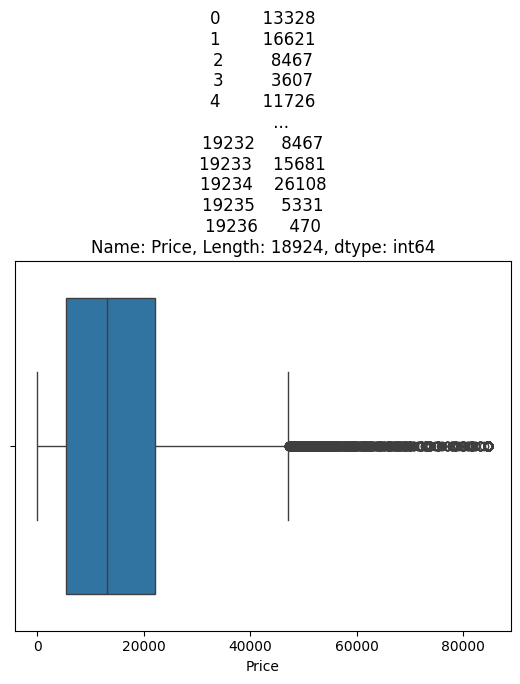

In [18]:
sns.boxplot(x=df['Price'])
plt.title(df['Price'])
plt.show()

In [19]:
df=df.drop(['ID'],axis=1)

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [21]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

# **pipline Model**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix , mean_squared_error, mean_absolute_error,r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor



In [23]:
x=df.drop("Price",axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2025)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=2025)

In [24]:
numerical_pipeline=Pipeline(steps=[
    ('Imputing',SimpleImputer(strategy='median')),
    ('Scaling',MinMaxScaler())
])

categorical_pipeline=Pipeline(steps=[
    ('Imputing',SimpleImputer(strategy='most_frequent')),
    ('Encoding',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [25]:
numerical_features=x.select_dtypes(include=['int','float']).columns
categorical_features=x.select_dtypes(include=['object','category']).columns

In [26]:
preprocessing=ColumnTransformer(transformers=[
    ('numerical_preprocessing',numerical_pipeline,numerical_features),
    ('Categorical_preprocessing',categorical_pipeline,categorical_features)
])



In [27]:
model=DummyRegressor(strategy='mean')
model.fit(x_train,y_train)
predictions=model.predict(x_train)
print('MAE on the training data',round(mean_absolute_error(y_train,predictions),2))

MAE on the training data 11822.79


# **Experiment 1 - LR OneHotEncoder**


In [28]:
model=Pipeline(steps=[
    ('Preprocessing',preprocessing),
    ('Modeling',LinearRegression())
])
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
mse_std = mean_squared_error(y_train,y_pred)
mae_std = mean_absolute_error(y_train,y_pred)
print(f"Experiment 1 - LR ")
print(f"MSE: {round(mse_std,2)}, MAE: {round(mae_std,2)}")
print(f"نسبة الخطأ: {round(mae_std / df['Price'].mean() * 100, 2)}%")


Experiment 1 - LR 
MSE: 121054041.97, MAE: 7438.34
نسبة الخطأ: 44.27%


# **Experiment 2 - LR OrdinalEncoder**
\

In [29]:
categorical_pipeline_lR2 = Pipeline(steps=[
    ('Imputing', SimpleImputer(strategy='most_frequent')),
    ('Encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessing_lR2=ColumnTransformer(transformers=[
    ('numerical_preprocessing',numerical_pipeline,numerical_features),
    ('Categorical_preprocessing',categorical_pipeline_lR2,categorical_features)
])



In [30]:
model=Pipeline(steps=[
    ('Preprocessing',preprocessing_lR2),
    ('Modeling',LinearRegression())
])
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
mse_std = mean_squared_error(y_train,y_pred)
mae_std = mean_absolute_error(y_train,y_pred)
print(f"Experiment 2 - LR OrdinalEncoder ")
print(f"MSE: {round(mse_std,2)}, MAE: {round(mae_std,2)}")
print(f"نسبة الخطأ: {round(mae_std / df['Price'].mean() * 100, 2)}%")


Experiment 2 - LR OrdinalEncoder 
MSE: 208157691.07, MAE: 10401.03
نسبة الخطأ: 61.91%


**Decision Tree Classifier:**

In [33]:
model = Pipeline(steps=[
    ('Preprocessing', preprocessing),
    ('Modeling', RandomForestRegressor(random_state=42))
])

param_grid = {
    'Modeling__n_estimators': [50, 100, 200],
    'Modeling__max_depth': [None, 5, 10],
    'Modeling__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# التدريب
grid_search.fit(x_train, y_train)

# أفضل نموذج
print("أفضل باراميترات:", grid_search.best_params_)
print("أفضل R2:", grid_search.best_score_)

# التنبؤ
y_pred = grid_search.predict(x_val)
print("Predictions:", y_pred)

أفضل باراميترات: {'Modeling__max_depth': None, 'Modeling__min_samples_split': 2, 'Modeling__n_estimators': 200}
أفضل R2: 0.7608670008641377


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Predictions: [ 9483.38    444.405 15902.83  ... 43128.835 31774.135 35925.025]


In [34]:
# التنبؤ النهائي
y_test_pred = grid_search.predict(x_test)

# التقييم
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Test R2:", test_r2)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Test R2: 0.7528302507641527
Test MAE: 4048.0119670561276
Test RMSE: 7772.513840581733
